# 2D project DDW report

In [1]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import math
import matplotlib.pyplot as plt
from cohortfunctions import *

In [2]:
# create new regression class with cohort solutions
class CohortLinearRegression():
    """
    Streamlined object using cohort functions
    """
    def __init__(self, df=None):
        self.df = df

    def fit(self, X=None, y=None):
        if X is None or y is None:
            print("Please add training data")
            return
        X = prepare_feature(X)
        y = prepare_target(y)
        iterations = 2500
        alpha = 0.01
        beta = np.zeros((X.shape[1],1))
        beta, J_storage = gradient_descent_linreg(X, y, beta, alpha, iterations)
        self.beta = beta
        self.J_storage = J_storage
        return self

    def predict(self, X):
        return predict_linreg(X, self.beta)

    @property
    def coef_(self):
        return self.beta[1:]
    @property
    def intercept_(self):
        return self.beta[0]

In [3]:
# reading the data
import os 
df = pd.read_excel("Datasets/2D dataset.xlsx")
df = df.drop(["Country Code", "temperature change per country in 2022", "ideal temperature?"], axis = 1)

In [4]:
df.head()

,Country,Agricultural Land( %),Co2-Emissions per ton,CPI,GDP,Population,Infant mortality,Minimum wage,Unemployment rate,Population: Labor force participation (%),temperature,Precipitation Depth (mm/year),Gini's index,GDP per capita,Human Development Index (2021),Prevalence of moderate or severe food insecurity in the total population (percent) (2022)
0,Afghanistan,0.581,8672.0,149.90,1.910135e+10,38041754.0,47.9,0.43,0.1112,0.489,NaN,327.0,NaN,502.115487,0.478,82.6
1,Albania,0.431,4536.0,119.05,1.527808e+10,2854191.0,7.8,1.12,0.1233,0.557,15.97,1485.0,29.4,5352.857411,0.796,33.1
2,Algeria,0.174,150006.0,151.36,1.699882e+11,43053054.0,20.1,0.95,0.1170,0.412,26.30,89.0,27.6,3948.343279,0.745,22.6
3,Andorra,0.400,469.0,NaN,3.154058e+09,77142.0,2.7,6.63,NaN,NaN,NaN,NaN,NaN,40886.391162,0.858,NaN
4,Angola,0.475,34693.0,261.73,9.463542e+10,31825295.0,51.6,0.71,0.0689,0.775,26.69,1010.0,51.3,2973.591160,0.586,79.9


In [5]:
# Imputation to give meaningful replacements for NaNs
print("Imputing...")
imp = IterativeImputer(max_iter=1000, random_state=0)
df_imp = imp.fit_transform(df.iloc[:,1:])
df_imp = pd.DataFrame(df_imp)
df_imp.columns = df.iloc[:,1:].columns
print(df_imp)
print("Imputed!")


Imputing...
Imputed!


In [6]:
df_imp["Country"] = df.loc[:, ["Country"]]

df_country_name = df_imp["Country"]
df_without_country_name = df_imp.drop(["Country"], axis = 1)

In [7]:
pd.DataFrame(df_without_country_name)

,Agricultural Land( %),Co2-Emissions per ton,CPI,GDP,Population,Infant mortality,Minimum wage,Unemployment rate,Population: Labor force participation (%),temperature,Precipitation Depth (mm/year),Gini's index,GDP per capita,Human Development Index (2021),Prevalence of moderate or severe food insecurity in the total population (percent) (2022)
0,0.581,8672.0,149.900000,1.910135e+10,38041754.0,47.9,0.43000,0.111200,0.489000,26.322551,327.000000,41.813372,502.115487,0.478,82.600000
1,0.431,4536.0,119.050000,1.527808e+10,2854191.0,7.8,1.12000,0.123300,0.557000,15.970000,1485.000000,29.400000,5352.857411,0.796,33.100000
2,0.174,150006.0,151.360000,1.699882e+11,43053054.0,20.1,0.95000,0.117000,0.412000,26.300000,89.000000,27.600000,3948.343279,0.745,22.600000
3,0.400,469.0,182.314266,3.154058e+09,77142.0,2.7,6.63000,0.051105,0.641294,15.216309,1165.978469,33.125272,40886.391162,0.858,13.600201
4,0.475,34693.0,261.730000,9.463542e+10,31825295.0,51.6,0.71000,0.068900,0.775000,26.690000,1010.000000,51.300000,2973.591160,0.586,79.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.245,164175.0,2740.270000,4.823593e+11,28515829.0,21.4,0.01000,0.088000,0.597000,32.167624,2044.000000,39.473927,16915.493453,0.691,42.946603
191,0.393,192668.0,163.520000,2.619212e+11,96462106.0,16.5,0.73000,0.020100,0.774000,24.660000,1821.000000,36.800000,2715.276036,0.703,10.000000
192,0.446,10609.0,157.580000,2.691440e+10,29161922.0,42.9,1.06537,0.129100,0.380000,24.062240,167.000000,36.700000,922.929642,0.455,71.200000
193,0.321,5141.0,212.310000,2.306472e+10,17861030.0,40.4,0.24000,0.114300,0.746000,26.750000,1020.000000,55.900000,1291.343357,0.565,76.000000


In [8]:
# Normalization
meansVector = df_without_country_name.mean()
stdsVector = df_without_country_name.std()
df_without_country_name_norm = (df_without_country_name - df_without_country_name.mean()) / df_without_country_name.std()

In [9]:
targetDf = df_without_country_name_norm[["Prevalence of moderate or severe food insecurity in the total population (percent) (2022)"]]

In [10]:
featureDf = df_without_country_name_norm.drop(["Prevalence of moderate or severe food insecurity in the total population (percent) (2022)"], axis = 1)

In [11]:
xTrain, xTest, yTrain, yTest = split_data(featureDf, targetDf, random_state=100, test_size=0.2)

In [12]:
# Creating a base model with all predictors
model = CohortLinearRegression()
model.fit(xTrain, yTrain)
# model.score(xTrain, yTrain) score not implemented

In [13]:
# Testing the predictions
predictions = model.predict(xTest)
mean_squared_error(yTest, predictions)

0.2799890612420673

In [14]:
print(model.coef_)
print(model.intercept_)

[[-0.03383635]
 [-0.17980435]
 [-0.00129235]
 [ 0.18144634]
 [-0.41697073]
 [ 0.36816858]
 [ 0.04251128]
 [-0.04627187]
 [-0.00936706]
 [ 0.10459405]
 [-0.02406406]
 [ 0.19544574]
 [-0.13212382]
 [-0.28044762]]
[0.01040029]


In [15]:
print(predictions.shape, yTest.shape)
predictions_1d = predictions.ravel()
yTest_1d = yTest.to_numpy().ravel()
pd.DataFrame({'preds': predictions_1d, 'actuals': yTest_1d})

(39, 1) (39, 1)


,preds,actuals
0,-0.069889,-0.478803
1,-0.602421,-0.867076
2,1.639908,0.999909
3,-1.170310,-0.940245
4,-0.371255,-0.814397
5,-0.883206,-0.915775
6,-0.935204,-0.709524
7,-1.251328,-1.031135
8,0.848749,0.349538
9,-0.887835,-0.989186


In [16]:
bestPredictors = pd.DataFrame({"predictors": xTrain.columns, "coefs": model.coef_.ravel()})
bestPredictors["coefs_abs"] = bestPredictors["coefs"].abs()
bestPredictors = bestPredictors.sort_values("coefs_abs", ascending = False)
bestPredictors = bestPredictors.drop(["coefs_abs"], axis = 1)
bestPredictors

,predictors,coefs
4,Population,-0.416971
5,Infant mortality,0.368169
13,Human Development Index (2021),-0.280448
11,Gini's index,0.195446
3,GDP,0.181446
1,Co2-Emissions per ton,-0.179804
12,GDP per capita,-0.132124
9,temperature,0.104594
7,Unemployment rate,-0.046272
6,Minimum wage,0.042511


# Making the best possible model

In [17]:
df_without_country_name_better = df_without_country_name.drop(["temperature", "Unemployment rate", "Minimum wage", "Agricultural Land( %)", "Precipitation Depth (mm/year)", "Population: Labor force participation (%)", "CPI", "GDP per capita"], axis = 1)
df_without_country_name_better

,Co2-Emissions per ton,GDP,Population,Infant mortality,Gini's index,Human Development Index (2021),Prevalence of moderate or severe food insecurity in the total population (percent) (2022)
0,8672.0,1.910135e+10,38041754.0,47.9,41.813372,0.478,82.600000
1,4536.0,1.527808e+10,2854191.0,7.8,29.400000,0.796,33.100000
2,150006.0,1.699882e+11,43053054.0,20.1,27.600000,0.745,22.600000
3,469.0,3.154058e+09,77142.0,2.7,33.125272,0.858,13.600201
4,34693.0,9.463542e+10,31825295.0,51.6,51.300000,0.586,79.900000
...,...,...,...,...,...,...,...
190,164175.0,4.823593e+11,28515829.0,21.4,39.473927,0.691,42.946603
191,192668.0,2.619212e+11,96462106.0,16.5,36.800000,0.703,10.000000
192,10609.0,2.691440e+10,29161922.0,42.9,36.700000,0.455,71.200000
193,5141.0,2.306472e+10,17861030.0,40.4,55.900000,0.565,76.000000


In [18]:
betterMeansVector = df_without_country_name_better.mean()
betterStdsVector = df_without_country_name_better.std()
df_without_country_name_better_norm = (df_without_country_name_better - df_without_country_name_better.mean()) / df_without_country_name_better.std()
betterTargetDf = df_without_country_name_better_norm[["Prevalence of moderate or severe food insecurity in the total population (percent) (2022)"]]
betterFeatureDf = df_without_country_name_better_norm.drop(["Prevalence of moderate or severe food insecurity in the total population (percent) (2022)"], axis = 1)
xTrain, xTest, yTrain, yTest = split_data(betterFeatureDf, betterTargetDf, random_state=42, test_size=0.3)

In [19]:
import itertools

def all_combinations(lst):
    # List to store all combinations
    comb_list = []

    # Generate combinations for all lengths
    for r in range(1, len(lst) + 1):
        comb_list.extend(itertools.combinations(lst, r))

    return comb_list

# Example usage
combinations = all_combinations(df_without_country_name_better.columns)
len(combinations)

127

In [40]:
# we have created two gridSearches one with the cohort LinearRegression Object, one with sklearn's LinearRegression object,
# we use the sklearn one for speed, but the cohort one should give the same result

def cohortgridSearch(xTrain, xTest, yTrain, yTest):
  allCombs = all_combinations(xTrain.columns)
  bestModelCoefs = []
  bestError = 10000000
  i = 0
  print(len(allCombs))
  for comb in allCombs:
    i += 1
    print(i)
    currXTrain = xTrain[list(comb)]
    currXTest = xTest[list(comb)]
    currModel = CohortLinearRegression()
    currModel.fit(currXTrain, yTrain)
    # model.score(xTrain, yTrain)
    predictions = currModel.predict(currXTest)
    currError = mean_squared_error(yTest, predictions)
    if currError < bestError:
      print(currError)
      bestError = currError
      bestModelCoefs = currModel.coef_

    # print(calculate_p_values(currModel, currXTrain, yTrain))
    # break
  return bestModelCoefs, bestError

In [41]:
from sklearn.linear_model import LinearRegression

def gridSearch(xTrain, xTest, yTrain, yTest):
  allCombs = all_combinations(xTrain.columns)
  bestModelCoefs = []
  bestError = 10000000
  #i = 0
  print(len(allCombs))
  for comb in allCombs:
    #i += 1
    #print(i)
    currXTrain = xTrain[list(comb)]
    currXTest = xTest[list(comb)]
    currModel = LinearRegression()
    currModel.fit(currXTrain, yTrain)
    # model.score(xTrain, yTrain)
    predictions = currModel.predict(currXTest)
    currError = mean_squared_error(yTest, predictions)
    if currError < bestError:
      print(currError)
      bestError = currError
      bestModelCoefs = currModel.coef_

    # print(calculate_p_values(currModel, currXTrain, yTrain))
    # break
  return bestModelCoefs, bestError

bestModelCoefs, bestError = gridSearch(xTrain, xTest, yTrain, yTest)

16383
0.8002586370883061
0.7987791375840352
0.7715804351104342
0.16828204726265406
0.10846248547924188
0.10381977029804881
0.09165640012143364
0.09146295165835205
0.09019887899186664
0.07840621844609305
0.07791882218380902
0.07663277014965125
0.0700658301634334
0.06350140451048705
0.06290074212860708
0.06254075273963909
0.058508264609676335
0.05824884290846718
0.05719410697678477
0.056977789866350374
0.05676054314924188
0.055984955691256326
0.05513268002181262
0.0550742711602641
0.05450656311517757


In [42]:
bestPredictors = pd.DataFrame({"predictors": xTrain.columns[0 : len(bestModelCoefs)], "coefs": bestModelCoefs})
bestPredictors["coefs_abs"] = bestPredictors["coefs"].abs()
bestPredictors = bestPredictors.sort_values("coefs_abs", ascending = False)
bestPredictors = bestPredictors.drop(["coefs_abs"], axis = 1)
bestPredictors

,predictors,coefs
1,Co2-Emissions per ton,-0.479647
2,CPI,0.419488
8,Population: Labor force participation (%),-0.226683
6,Minimum wage,0.181196
5,Infant mortality,0.126680
7,Unemployment rate,-0.077491
0,Agricultural Land( %),0.059565
3,GDP,-0.015487
4,Population,-0.012583


Population


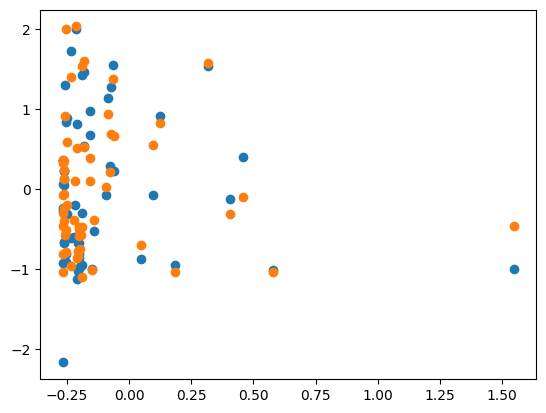

In [43]:
xrain, xest, yrain, yest = split_data(betterFeatureDf[bestPredictors['predictors']], betterTargetDf, random_state=42, test_size=0.3)
best_model = LinearRegression()
best_model.fit(xrain, yrain)
redictions = best_model.predict(xest)
x_axis = betterFeatureDf[bestPredictors].columns[4]
print(x_axis)
plt.scatter(xest[x_axis], yest)
plt.scatter(xest[x_axis], redictions)

In [ ]:
# Again two gridsearchs, but now using cross validation for better verification

from sklearn.model_selection import cross_validate

def cohortgridSearch_withcv(xTrain, xTest, yTrain, yTest, entireX, entireY):
  allCombs = all_combinations(xTrain.columns)
  bestModelCoefs = []
  bestError = 10000000
  # i = 0
  print(len(allCombs))
  for comb in allCombs:
    # i += 1
    # print(i)
    currEntireX = entireX[list(comb)]
    currXTrain = xTrain[list(comb)]
    currXTest = xTest[list(comb)]
    currModel = CohortLinearRegression()
    currModel.fit(currXTrain, yTrain)
    # model.score(xTrain, yTrain)
    # predictions = currModel.predict(currXTest)
    # currError = mean_squared_error(yTest, predictions)
    currCrossVal = cross_validate(currModel, currEntireX, entireY, cv=10, scoring="neg_mean_squared_error", return_train_score = True)
    currMeanError = - sum(currCrossVal["test_score"]) / len(currCrossVal["test_score"])
    if currMeanError < bestError:
      print(currMeanError)
      bestError = currMeanError
      bestModelCoefs = currModel.coef_

    # print(calculate_p_values(currModel, currXTrain, yTrain))
    # break
  return bestModelCoefs, bestError

def gridSearch_withcv(xTrain, xTest, yTrain, yTest, entireX, entireY):
  allCombs = all_combinations(xTrain.columns)
  bestModelCoefs = []
  bestError = 10000000
  # i = 0
  print(len(allCombs))
  for comb in allCombs:
    # i += 1
    # print(i)
    currEntireX = entireX[list(comb)]
    currXTrain = xTrain[list(comb)]
    currXTest = xTest[list(comb)]
    currModel = LinearRegression()
    currModel.fit(currXTrain, yTrain)
    # model.score(xTrain, yTrain)
    # predictions = currModel.predict(currXTest)
    # currError = mean_squared_error(yTest, predictions)
    currCrossVal = cross_validate(currModel, currEntireX, entireY, cv=10, scoring="neg_mean_squared_error", return_train_score = True)
    currMeanError = - sum(currCrossVal["test_score"]) / len(currCrossVal["test_score"])
    if currMeanError < bestError:
      print(currMeanError)
      bestError = currMeanError
      bestModelCoefs = currModel.coef_

    # print(calculate_p_values(currModel, currXTrain, yTrain))
    # break
  return bestModelCoefs, bestError

In [ ]:
# finding best model from the subset of 6 human selected predictors based upon our initial model
bestModelCoefs, bestError = gridSearch_withcv(xTrain, xTest, yTrain, yTest, betterFeatureDf, betterTargetDf)

In [25]:
bestPredictors = pd.DataFrame({"predictors": xTrain.columns[0 : len(bestModelCoefs)], "coefs": bestModelCoefs})
bestPredictors["coefs_abs"] = bestPredictors["coefs"].abs()
bestPredictors = bestPredictors.sort_values("coefs_abs", ascending = False)
bestPredictors = bestPredictors.drop(["coefs_abs"], axis = 1)
bestPredictors

,predictors,coefs
3,Infant mortality,0.396937
2,Population,-0.362333
5,Human Development Index (2021),-0.339610
0,Co2-Emissions per ton,-0.282759
4,Gini's index,0.227261
1,GDP,0.211315


# Testing ALLLLLLLL Combinations

In [26]:
df_without_country_name_better = df_without_country_name

In [60]:
betterMeansVector = df_without_country_name_better.mean()
betterStdsVector = df_without_country_name_better.std()
df_without_country_name_better_norm = (df_without_country_name_better - df_without_country_name_better.mean()) / df_without_country_name_better.std()
betterTargetDf = df_without_country_name_better_norm[["Prevalence of moderate or severe food insecurity in the total population (percent) (2022)"]]
betterFeatureDf = df_without_country_name_better_norm.drop(["Prevalence of moderate or severe food insecurity in the total population (percent) (2022)"], axis = 1)
xTrain, xTest, yTrain, yTest = split_data(betterFeatureDf, betterTargetDf, random_state=42, test_size=0.3)

In [61]:
# finding best Model from all subsets of model predictors using cross validation
bestModelCoefs, bestError = gridSearch_cv(xTrain, xTest, yTrain, yTest, betterFeatureDf, betterTargetDf)

16383
1
0.9827777199688402
2
0.7983618576205744
3
4
5
6
0.4008719821847267
7
8
9
10
11
12
13
14
0.39047555259567385
15
16
17
18
19
20
21
22
23
24
25
26
27
0.38850829255194014
28
29
30
31
0.2793046539036386
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
0.2021968787040474
62
63
64
65
66
67
68
69
0.1900562826361981
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237


KeyboardInterrupt: 

In [62]:
bestPredictors = pd.DataFrame({"predictors": xTrain.columns[0 : len(bestModelCoefs)], "coefs": bestModelCoefs})
bestPredictors["coefs_abs"] = bestPredictors["coefs"].abs()
bestPredictors = bestPredictors.sort_values("coefs_abs", ascending = False)
bestPredictors = bestPredictors.drop(["coefs_abs"], axis = 1)
bestPredictors

,predictors,coefs
3,GDP,0.406926
2,CPI,-0.390648
8,Population: Labor force participation (%),-0.238563
0,Agricultural Land( %),-0.238312
1,Co2-Emissions per ton,0.217383
6,Minimum wage,0.189590
7,Unemployment rate,-0.099481
5,Infant mortality,0.090953
4,Population,-0.019131


In [102]:
# best mean squared error
bestError

0.11782597893925004

GDP


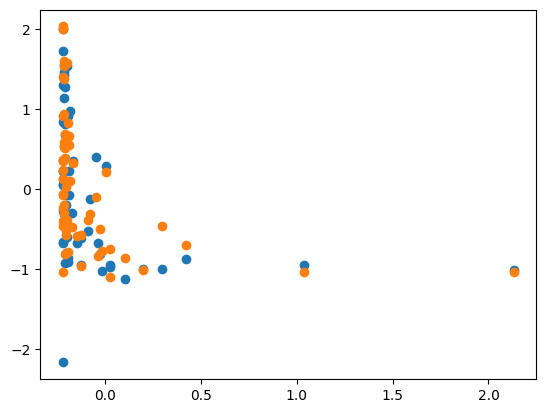

In [82]:
xrain, xest, yrain, yest = split_data(betterFeatureDf[bestPredictors['predictors']], betterTargetDf, random_state=42, test_size=0.3)
best_model = LinearRegression()
best_model.fit(xrain, yrain)
redictions = best_model.predict(xest)
x_axis = betterFeatureDf[bestPredictors].columns[3]
print(x_axis)
plt.scatter(xest[x_axis], yest)
plt.scatter(xest[x_axis], redictions)

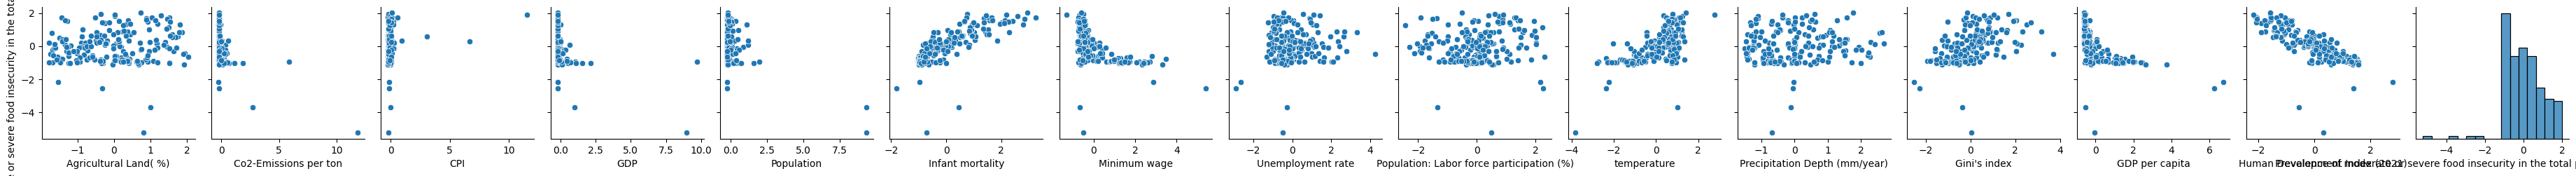

In [83]:
# showing the relationship between the best predictors and our target
plot0 = sns.pairplot(data=df_without_country_name_better_norm,
                    y_vars = ['Prevalence of moderate or severe food insecurity in the total population (percent) (2022)']) 

Agricultural Land( %)


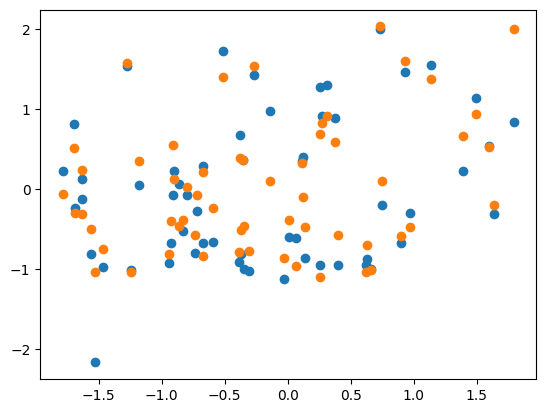

In [101]:
# showing the test vs train values for each predictor
# Agricultal Land
x_axis = betterFeatureDf[bestPredictors].columns[0]
print(x_axis)
plt.scatter(xest[x_axis], yest)
plt.scatter(xest[x_axis], redictions)

Co2-Emissions per ton


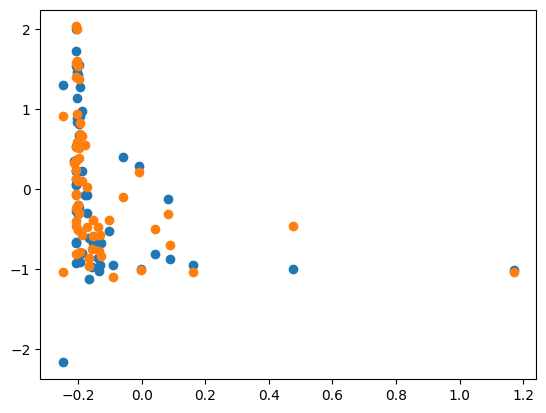

In [86]:
# Co2-Emissions per ton
x_axis = betterFeatureDf[bestPredictors].columns[1]
print(x_axis)
plt.scatter(xest[x_axis], yest)
plt.scatter(xest[x_axis], redictions)

CPI


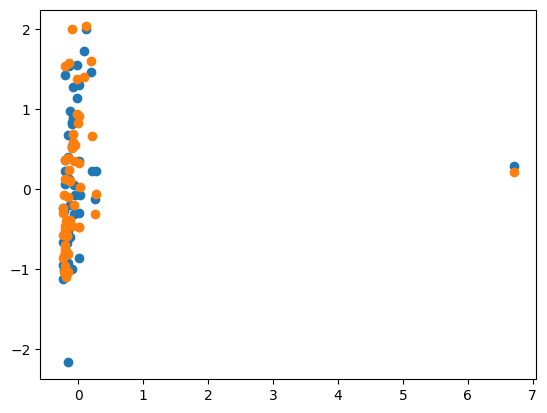

In [88]:
# CPI
x_axis = betterFeatureDf[bestPredictors].columns[2]
print(x_axis)
plt.scatter(xest[x_axis], yest)
plt.scatter(xest[x_axis], redictions)

GDP


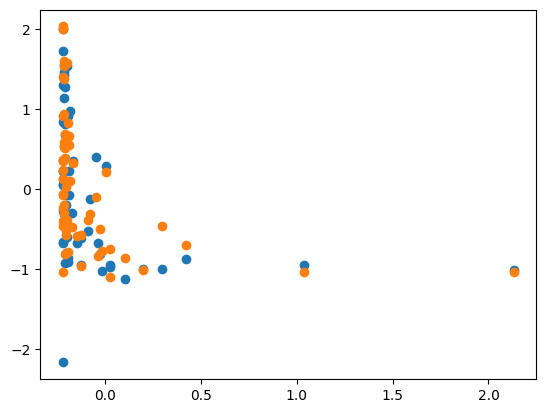

In [90]:
# GDP
x_axis = betterFeatureDf[bestPredictors].columns[3]
print(x_axis)
plt.scatter(xest[x_axis], yest)
plt.scatter(xest[x_axis], redictions)

Population


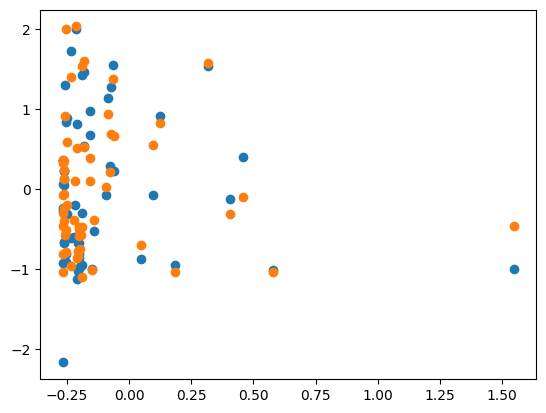

In [92]:
# Population
x_axis = betterFeatureDf[bestPredictors].columns[4]
print(x_axis)
plt.scatter(xest[x_axis], yest)
plt.scatter(xest[x_axis], redictions)

Infant mortality


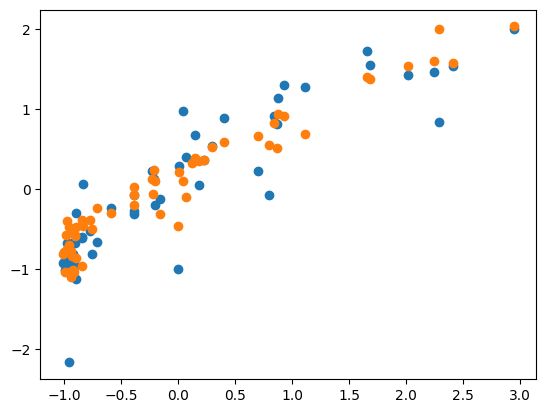

In [94]:
# Infant mortality
x_axis = betterFeatureDf[bestPredictors].columns[5]
print(x_axis)
plt.scatter(xest[x_axis], yest)
plt.scatter(xest[x_axis], redictions)

Minimum wage


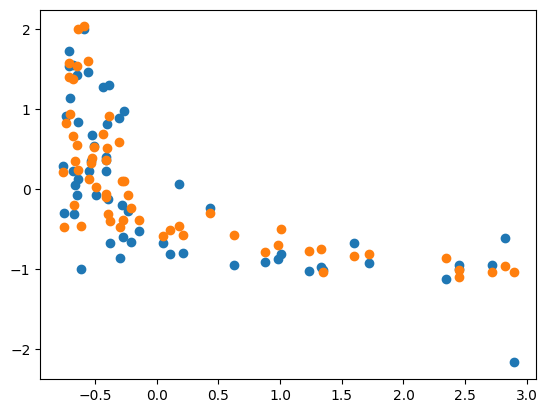

In [96]:
# Minimum wage
x_axis = betterFeatureDf[bestPredictors].columns[6]
print(x_axis)
plt.scatter(xest[x_axis], yest)
plt.scatter(xest[x_axis], redictions)

Unemployment rate


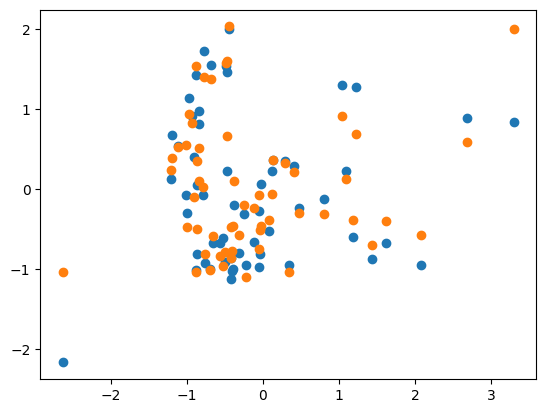

In [98]:
# Unemployment rate
x_axis = betterFeatureDf[bestPredictors].columns[7]
print(x_axis)
plt.scatter(xest[x_axis], yest)
plt.scatter(xest[x_axis], redictions)

Population: Labor force participation (%)


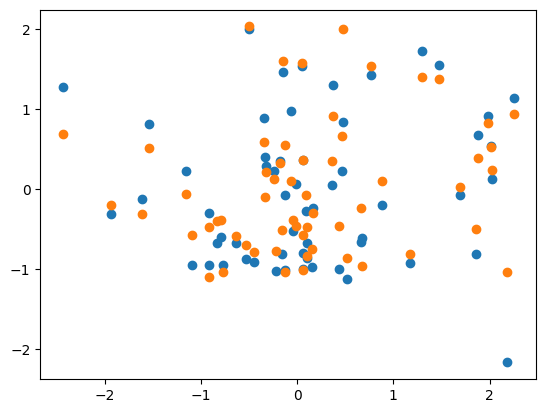

In [100]:
# Population: Labor force participation (%)
x_axis = betterFeatureDf[bestPredictors].columns[8]
print(x_axis)
plt.scatter(xest[x_axis], yest)
plt.scatter(xest[x_axis], redictions)

In [66]:
kenya = df_without_country_name_better_norm.iloc[[88]]
kenya

,Agricultural Land( %),Co2-Emissions per ton,CPI,GDP,Population,Infant mortality,Minimum wage,Unemployment rate,Population: Labor force participation (%),temperature,Precipitation Depth (mm/year),Gini's index,GDP per capita,Human Development Index (2021),Prevalence of moderate or severe food insecurity in the total population (percent) (2022)
88,0.440442,-0.186242,-0.02542,-0.175804,0.085584,0.482986,-0.6871,-0.805373,1.139785,0.519776,-0.702173,0.259592,-0.548085,-0.939804,1.363469


In [67]:
kenya = pd.DataFrame(kenya[['GDP', 'CPI', 'Population: Labor force participation (%)',
       'Agricultural Land( %)', 'Co2-Emissions per ton', 'Minimum wage',
       'Unemployment rate', 'Infant mortality', 'Population']])
kenya

,GDP,CPI,Population: Labor force participation (%),Agricultural Land( %),Co2-Emissions per ton,Minimum wage,Unemployment rate,Infant mortality,Population
88,-0.175804,-0.02542,1.139785,0.440442,-0.186242,-0.6871,-0.805373,0.482986,0.085584


In [68]:
best_model.feature_names_in_

array(['GDP', 'CPI', 'Population: Labor force participation (%)',
       'Agricultural Land( %)', 'Co2-Emissions per ton', 'Minimum wage',
       'Unemployment rate', 'Infant mortality', 'Population'],
      dtype=object)

In [69]:
kenyaPred = best_model.predict(kenya)


In [70]:
kenyaMean = df["Prevalence of moderate or severe food insecurity in the total population (percent) (2022)"].mean()

In [71]:
kenyaStd = df["Prevalence of moderate or severe food insecurity in the total population (percent) (2022)"].std()

In [72]:
kenyaPred * kenyaStd + kenyaMean

array([[49.43934147]])

In [73]:
df.iloc[[88]].T

,88
Country,Kenya
Agricultural Land( %),0.485
Co2-Emissions per ton,17910.0
CPI,180.51
GDP,95503088538.0
Population,52573973.0
Infant mortality,30.6
Minimum wage,0.25
Unemployment rate,0.0264
Population: Labor force participation (%),0.747
